<a href="https://colab.research.google.com/github/RoshilaHatharasinghe/RoshilaHatharasinghe.github.io/blob/main/models/IN1_LSTM_GRID_Version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=5dbf44105aaa09e18c67a627eabcaffb3cb0c6e5474c3ecd02573ed70b0fc574
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import pandas as pd
import pandas_ta as ta

data = pd.read_csv('LKR=X (1).csv')

data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-31,173.419998,176.449997,173.419998,176.300003,176.300003,0
1,2019-06-03,172.809998,176.490005,172.809998,172.449997,172.449997,0
2,2019-06-04,172.520004,176.509995,172.520004,176.440002,176.440002,0
3,2019-06-05,173.380005,176.399994,173.380005,176.350006,176.350006,0
4,2019-06-06,173.809998,176.350006,173.809998,176.360001,176.360001,0
...,...,...,...,...,...,...,...
1301,2024-05-27,296.123901,297.297058,296.123901,295.987457,295.987457,0
1302,2024-05-28,297.227264,298.504425,297.227264,297.297058,297.297058,0
1303,2024-05-29,299.508514,299.508514,298.592590,299.327850,299.327850,0
1304,2024-05-30,299.668427,299.668427,298.626251,298.592590,298.592590,0


In [ ]:
data['T-4'] = data['Close']
data['T-3'] = data['Close'].shift(-1)
data['T-2'] = data['Close'].shift(-2)
data['T-1'] = data['Close'].shift(-3)
data['T0'] = data['Close'].shift(-4)

data['SMA_5_H'] = ta.sma(data['High'], length=5).shift(-4)
data['SMA_5_L'] = ta.sma(data['Low'], length=5).shift(-4)
data['EMA_5_C'] = ta.ema(data['Close'], length=5).shift(-4)
data['RSI'] = ta.rsi(data['Close'], length=14).shift(-14)

#Closing value of the next day
data['T_F'] = data['Close'].shift(-5)

print(data.head(10))


         Date        Open        High         Low       Close   Adj Close  \
0  2019-05-31  173.419998  176.449997  173.419998  176.300003  176.300003   
1  2019-06-03  172.809998  176.490005  172.809998  172.449997  172.449997   
2  2019-06-04  172.520004  176.509995  172.520004  176.440002  176.440002   
3  2019-06-05  173.380005  176.399994  173.380005  176.350006  176.350006   
4  2019-06-06  173.809998  176.350006  173.809998  176.360001  176.360001   
5  2019-06-07  172.660004  176.399994  172.660004  176.339996  176.339996   
6  2019-06-10  172.550003  176.460007  172.550003  176.350006  176.350006   
7  2019-06-11  173.169998  176.449997  173.169998  176.360001  176.360001   
8  2019-06-12  173.169998  176.550003  173.169998  176.360001  176.360001   
9  2019-06-13  173.889999  176.550003  173.889999  176.419998  176.419998   

   Volume         T-4         T-3         T-2         T-1          T0  \
0       0  176.300003  172.449997  176.440002  176.350006  176.360001   
1     

In [ ]:
print(data.tail(10))

            Date        Open        High         Low       Close   Adj Close  \
1296  2024-05-20  295.506714  296.635529  295.506714  294.929016  294.929016   
1297  2024-05-21  296.688782  296.796051  296.688782  296.739319  296.739319   
1298  2024-05-22  296.992859  296.992859  296.874847  296.796051  296.796051   
1299  2024-05-23  297.043518  297.043518  296.886108  296.874847  296.874847   
1300  2024-05-24  297.840454  297.840454  296.466858  296.886108  296.886108   
1301  2024-05-27  296.123901  297.297058  296.123901  295.987457  295.987457   
1302  2024-05-28  297.227264  298.504425  297.227264  297.297058  297.297058   
1303  2024-05-29  299.508514  299.508514  298.592590  299.327850  299.327850   
1304  2024-05-30  299.668427  299.668427  298.626251  298.592590  298.592590   
1305  2024-05-31  301.350006  301.640015  301.220001  301.329987  301.329987   

      Volume         T-4         T-3         T-2         T-1          T0  \
1296       0  294.929016  296.739319  296.7

In [ ]:
# Dropping NaN values
data.dropna(inplace=True)

print(data.tail(10))


            Date        Open        High         Low       Close   Adj Close  \
1282  2024-04-30  294.208221  294.208221  293.375488  294.090210  294.090210   
1283  2024-05-01  295.085663  295.217194  294.853363  293.375488  293.375488   
1284  2024-05-02  293.709625  293.917816  293.709625  294.853363  294.853363   
1285  2024-05-03  293.085205  293.881195  293.085205  293.917816  293.917816   
1286  2024-05-06  293.332581  293.715454  293.332581  293.463409  293.463409   
1287  2024-05-07  293.626862  296.502350  293.626862  293.715454  293.715454   
1288  2024-05-08  297.038910  297.067932  297.038910  296.502350  296.502350   
1289  2024-05-09  297.171631  297.171631  295.473602  297.067932  297.067932   
1290  2024-05-10  294.186676  295.699127  294.186676  295.473602  295.473602   
1291  2024-05-13  295.998444  296.051788  295.826752  295.924255  295.924255   

      Volume         T-4         T-3         T-2         T-1          T0  \
1282       0  294.090210  293.375488  294.8

In [ ]:
data = data[['Date', 'T-4','T-3','T-2','T-1','T0','SMA_5_H','SMA_5_L','EMA_5_C','RSI','T_F']]

data

,Date,T-4,T-3,T-2,T-1,T0,SMA_5_H,SMA_5_L,EMA_5_C,RSI,T_F
0,2019-05-31,176.300003,172.449997,176.440002,176.350006,176.360001,176.439999,173.188001,175.580002,52.979559,176.339996
1,2019-06-03,172.449997,176.440002,176.350006,176.360001,176.339996,176.429999,173.036002,175.833333,53.177859,176.350006
2,2019-06-04,176.440002,176.350006,176.360001,176.339996,176.350006,176.423999,172.984003,176.005557,52.937432,176.360001
3,2019-06-05,176.350006,176.360001,176.339996,176.350006,176.360001,176.412000,173.114002,176.123705,51.515911,176.360001
4,2019-06-06,176.360001,176.339996,176.350006,176.360001,176.360001,176.442001,173.072000,176.202471,51.341348,176.419998
...,...,...,...,...,...,...,...,...,...,...,...
1287,2024-05-07,293.715454,296.502350,297.067932,295.473602,295.924255,296.498566,295.230560,295.650012,47.739295,296.051788
1288,2024-05-08,296.502350,297.067932,295.473602,295.924255,296.051788,296.843109,295.686188,295.783937,53.208312,298.225067
1289,2024-05-09,297.067932,295.473602,295.924255,296.051788,298.225067,297.156110,295.817273,296.597647,60.169194,298.632935
1290,2024-05-10,295.473602,295.924255,296.051788,298.225067,298.632935,297.230341,296.077960,297.276076,56.870495,297.542786


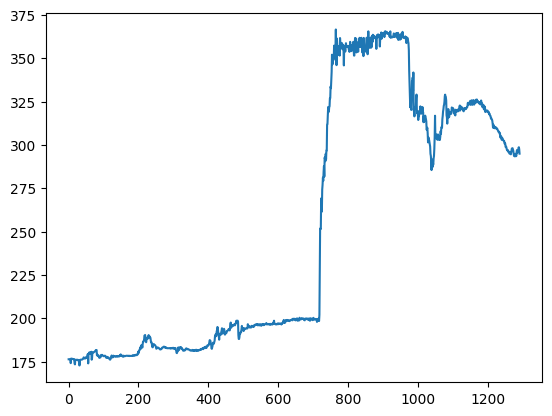

In [ ]:
import matplotlib.pyplot as plt

plt.plot(data.index, data['T_F'])

In [ ]:
dates=data['Date'].to_numpy()
middle_matrix =data[['T-4','T-3','T-2','T-1','T0','SMA_5_H','SMA_5_L','EMA_5_C','RSI']].to_numpy()
X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
Y=data['T_F']

print(dates.shape)
print(X.shape)
print(Y.shape)

(1292,)
(1292, 9, 1)
(1292,)


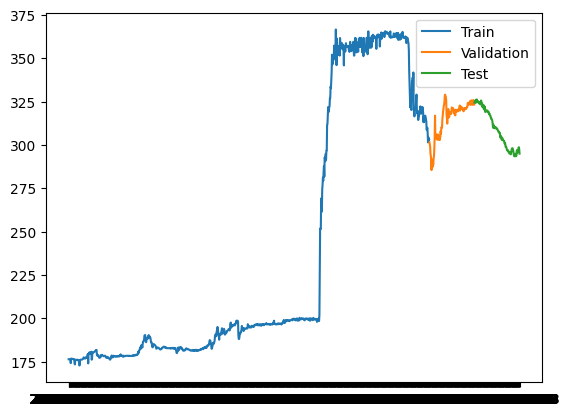

In [ ]:
q_80 = int(len(dates) * .8) #change to 0.8
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], Y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], Y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], Y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras import layers

# # model = Sequential([layers.Input((9, 1)),
# #                     layers.LSTM(300),
# #                     layers.Dense(1)])

# model = Sequential([layers.Input((9, 1)),
#                    layers.LSTM(64),
#                    layers.Dense(10, activation='relu'),
#                    layers.Dense(10, activation='relu'),
#                    layers.Dense(1)])

# model.compile(loss='mse',
#               optimizer=Adam(learning_rate=0.01),
#               metrics=['mean_absolute_error'])

# model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# Define different parameter values to iterate over
epochs_values = [20,30,50]
lstm_units_values = [32, 128, 64]
learning_rate_values = [0.1, 0.01, 0.001]

best_loss = float('inf')
best_epochs = None
best_lstm_units = None
best_learning_rate = None
hist = []

# Define X_train, y_train, X_val, y_val

# Loop over different parameter combinations
for epochs in epochs_values:
    for lstm_units in lstm_units_values:
        for learning_rate in learning_rate_values:
            print(f"Training model with epochs={epochs}, lstm_units={lstm_units}, learning_rate={learning_rate}")

            # model = Sequential([layers.Input((9, 1)),
            #         layers.LSTM(lstm_units),
            #         layers.Dense(1)])

            # Define the model
            model = Sequential([
                layers.Input((9, 1)),
                layers.LSTM(lstm_units),
                layers.Dense(10, activation='relu'),
                layers.Dense(10, activation='relu'),
                layers.Dense(1)
            ])

            model.compile(loss='mse',
                          optimizer=Adam(learning_rate=learning_rate),
                          metrics=['mean_absolute_error'])

            # Train the model
            history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, verbose=0)

            # Check if this combination has the best validation loss so far
            if history.history['loss'][-1] < best_loss:
                hist = history.history
                best_loss = history.history['loss'][-1]
                best_epochs = epochs
                best_lstm_units = lstm_units
                best_learning_rate = learning_rate

# Print the best combination
print(f"Best combination: epochs={best_epochs}, lstm_units={best_lstm_units}, learning_rate={best_learning_rate}, Validation Loss={best_loss}")

# # Add labels and legend
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss')
# # plt.legend()
# plt.show()


Training model with epochs=30, lstm_units=32, learning_rate=0.1
Training model with epochs=30, lstm_units=32, learning_rate=0.01
Training model with epochs=30, lstm_units=32, learning_rate=0.001
Training model with epochs=30, lstm_units=128, learning_rate=0.1
Training model with epochs=30, lstm_units=128, learning_rate=0.01
Training model with epochs=30, lstm_units=128, learning_rate=0.001
Training model with epochs=30, lstm_units=64, learning_rate=0.1
Training model with epochs=30, lstm_units=64, learning_rate=0.01
Training model with epochs=30, lstm_units=64, learning_rate=0.001
Best combination: epochs=30, lstm_units=32, learning_rate=0.001, Validation Loss=8.331846038345248e-05


Epoch 1/50
33/33 [==============================] - 5s 21ms/step - loss: 60350.6953 - mean_absolute_error: 234.1835 - val_loss: 97989.8828 - val_mean_absolute_error: 312.8607
Epoch 2/50
33/33 [==============================] - 0s 6ms/step - loss: 58302.0938 - mean_absolute_error: 229.7328 - val_loss: 93625.4141 - val_mean_absolute_error: 305.8061
Epoch 3/50
33/33 [==============================] - 0s 6ms/step - loss: 53999.0977 - mean_absolute_error: 220.1624 - val_loss: 84961.8672 - val_mean_absolute_error: 291.2968
Epoch 4/50
33/33 [==============================] - 0s 6ms/step - loss: 45197.5859 - mean_absolute_error: 199.0067 - val_loss: 69771.2188 - val_mean_absolute_error: 263.9383
Epoch 5/50
33/33 [==============================] - 0s 6ms/step - loss: 33618.2539 - mean_absolute_error: 167.3527 - val_loss: 51975.1484 - val_mean_absolute_error: 227.7440
Epoch 6/50
33/33 [==============================] - 0s 5ms/step - loss: 22021.9258 - mean_absolute_error: 127.9004 - val_loss: 34

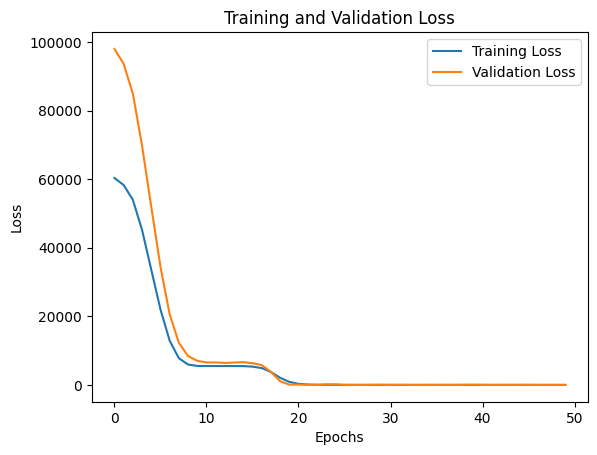

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# model = Sequential([layers.Input((9, 1)),
#                     layers.LSTM(64),
#                     layers.Dense(1)])

model = Sequential([layers.Input((9, 1)),
                   layers.LSTM(128),
                   layers.Dense(10, activation='relu'),
                   layers.Dense(10, activation='relu'),
                   layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])


history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

print(history.history.keys())

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

33/33 [==============================] - 0s 2ms/step


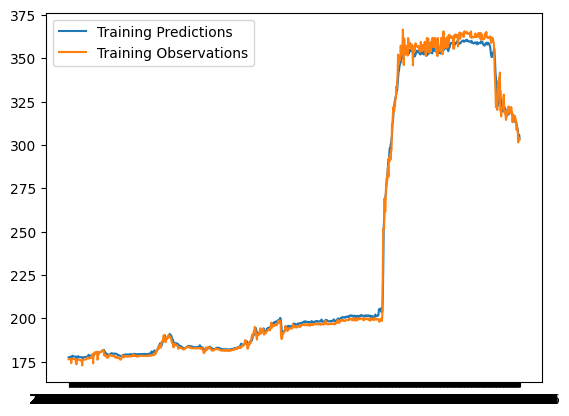

In [ ]:
from sklearn.metrics import mean_squared_error

train_predictions = model.predict(X_train).flatten()
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

218.09109034063414


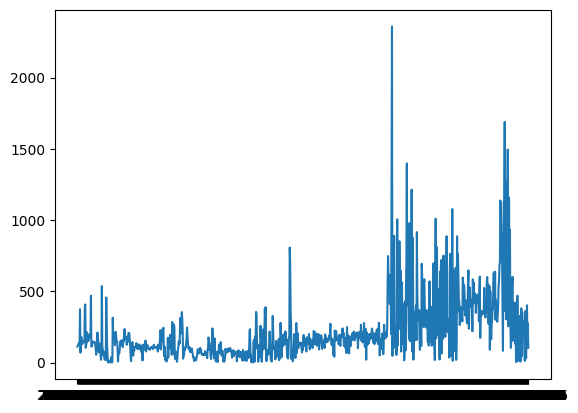

In [ ]:
import numpy as np

basis_point_value=0.01  #For USDLKR pair
train_data_basis_point_diff=((train_predictions/basis_point_value).flatten()-y_train/basis_point_value).abs()
plt.plot(dates_train, train_data_basis_point_diff)

average_train_data_basis_point_diff=np.mean(train_data_basis_point_diff)
print(average_train_data_basis_point_diff)

5/5 [==============================] - 0s 3ms/step


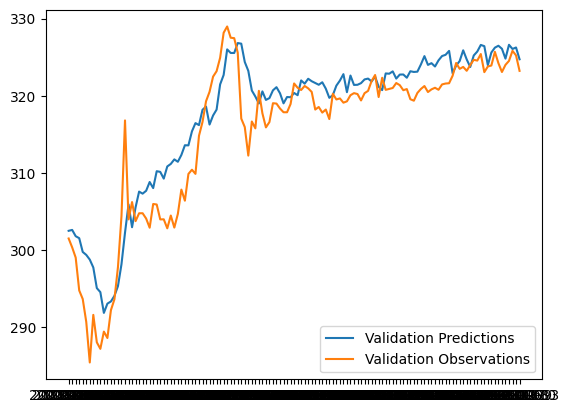

In [ ]:
val_predictions = model.predict(X_val).flatten()
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

315.3161898498066


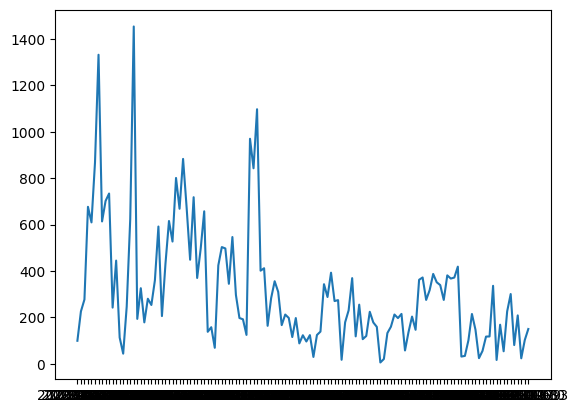

In [ ]:
basis_point_value=0.01  #For USDLKR pair
validation_data_basis_point_diff=((val_predictions/basis_point_value).flatten()-y_val/basis_point_value).abs()
plt.plot(dates_val, validation_data_basis_point_diff)

print(np.mean(validation_data_basis_point_diff))

5/5 [==============================] - 0s 3ms/step


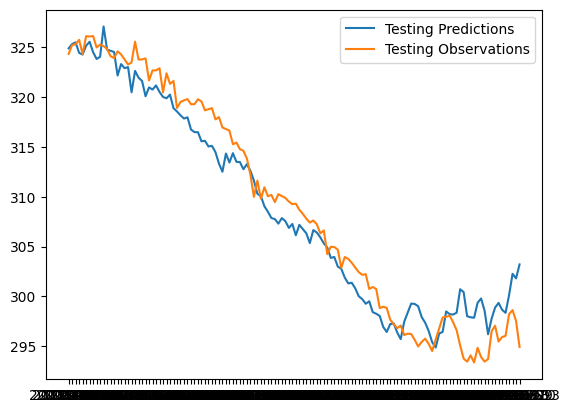

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Assuming test_predictions and y_test are lists or numpy arrays
# Calculate MSE and MAE
mse = mean_squared_error(y_test, test_predictions)
print("Mean Square Error:", mse)
mae=mean_absolute_error(y_test, test_predictions)
print("Mean Absolute Error:", mae)

Mean Square Error: 6.2955373208395145
Mean Absolute Error: 2.049891323572714


204.98887600961507


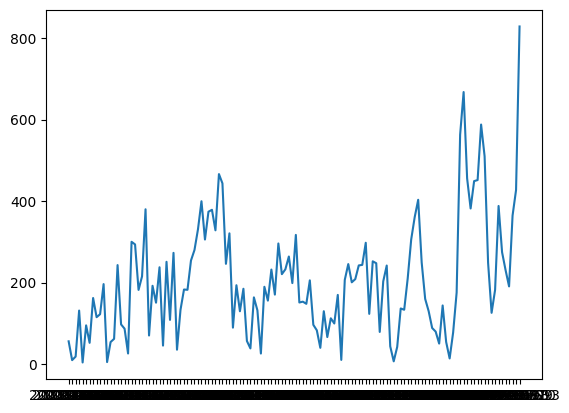

In [ ]:
basis_point_value=0.01  #For USDLKR pair
test_data_basis_point_diff=((test_predictions/basis_point_value).flatten()-y_test/basis_point_value).abs()
plt.plot(dates_test, test_data_basis_point_diff)

print(np.mean(test_data_basis_point_diff))

In [ ]:
#Start Trading with 1000 LKR with model


number_of_trading_days=dates_test.size
test_data=y_test.values
holding_currency="quote"
holding_value=1000
for current_trading_day in range(number_of_trading_days-1):
  if holding_currency=="quote":
    if (test_predictions[current_trading_day+1]>test_data[current_trading_day]):
      holding_value=holding_value/test_data[current_trading_day]
      holding_currency="base"
  else:
    if (test_predictions[current_trading_day+1]<test_data[current_trading_day]):
      holding_value=test_data[current_trading_day]*holding_value
      holding_currency="quote"


if holding_currency=="base":
  holding_value=test_data[current_trading_day]*holding_value

print(number_of_trading_days)
print(holding_value)
print(holding_currency)


130
1010.6357914367087
base


In [ ]:
#Start Trading with 1000 USD LKR actual values


number_of_trading_days=dates_test.size
test_data=y_test.values
holding_currency="quote"
holding_value=1000
for current_trading_day in range(number_of_trading_days-1):
  if holding_currency=="quote":
    if (test_data[current_trading_day+1]>test_data[current_trading_day]):
      holding_value=holding_value/test_data[current_trading_day]
      holding_currency="base"
  else:
    if (test_data[current_trading_day+1]<test_data[current_trading_day]):
      holding_value=test_data[current_trading_day]*holding_value
      holding_currency="quote"


if holding_currency=="base":
  holding_value=test_data[current_trading_day]*holding_value

print(number_of_trading_days)
print(holding_value)
print(holding_currency)

130
1110.334441821766
quote


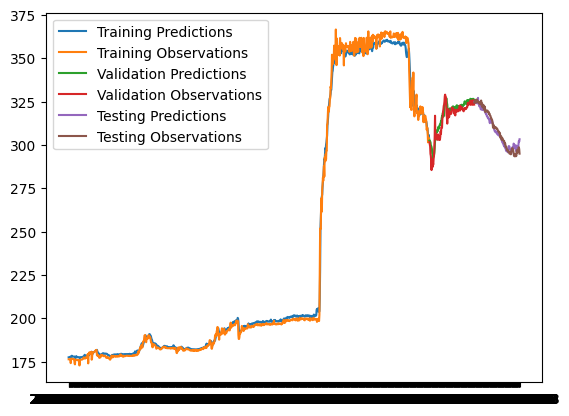

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

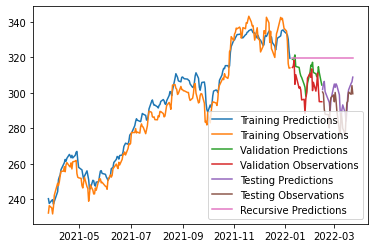

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])